In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('whitegrid')

In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
ID_test=df_test['PassengerId']

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Removal Of Outliners**

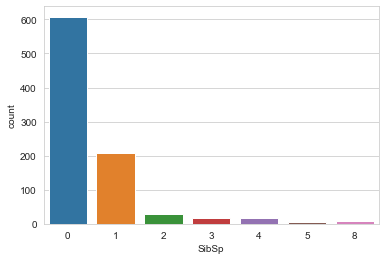

In [5]:
sea.countplot(df_train['SibSp'])

In [6]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**7 entries have abnormally high SibSp value**

In [7]:
df_train.sort_values(by=['SibSp'],ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S


In [8]:
outliner_SibSp=df_train.loc[df_train['SibSp']==8]
outliner_SibSp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [9]:
df_train=df_train.drop(outliner_SibSp.index,axis=0)

In [10]:
df_train.loc[df_train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


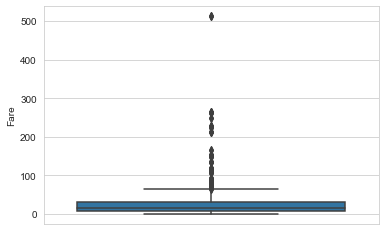

In [11]:
sea.boxplot(df_train['Fare'],orient='v')

In [12]:
df_train.sort_values(by=['Fare','Pclass'],ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


** 3 entries have very high Fare **

In [13]:
outliner_Fare=df_train.loc[df_train['Fare']>500]
outliner_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [14]:
df_train=df_train.drop(outliner_Fare.index,axis=0)

** After removal of outliners now we can merge the train and test dataset to fill the missing values**

In [15]:
df_train.shape

(881, 12)

In [16]:
df_test.shape

(418, 11)

In [17]:
dataset=pd.concat([df_train,df_test],ignore_index=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [19]:
dataset.shape

(1299, 12)

In [20]:
dataset=dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1006
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

** 2 Entries of Emabarked Column have Null Value **

In [21]:
dataset.loc[dataset['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


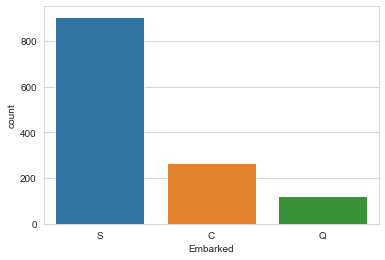

In [22]:
sea.countplot(dataset['Embarked'])

** Fill the missing Embarked Value with the most frequent one i.e 'S' **

In [23]:
dataset['Embarked']=dataset['Embarked'].fillna('S')

In [24]:
dataset.loc[dataset['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [25]:
dataset.loc[(dataset['Pclass']==3)].sort_values(by=['Fare'],ascending=False).head(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1069,NaN,NaN,S,69.5500,"Sage, Miss. Ada",2,1080,3,female,8,NaN,CA. 2343
1246,NaN,NaN,S,69.5500,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343
1241,14.5,NaN,S,69.5500,"Sage, Master. William Henry",2,1252,3,male,8,NaN,CA. 2343
1223,NaN,NaN,S,69.5500,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343
638,NaN,NaN,S,56.4958,"Foo, Mr. Choong",0,644,3,male,0,1.0,1601
920,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,931,3,male,0,NaN,1601
686,NaN,NaN,S,56.4958,"Lam, Mr. Ali",0,693,3,male,0,1.0,1601
74,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,75,3,male,0,1.0,1601
830,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,839,3,male,0,1.0,1601
818,NaN,NaN,S,56.4958,"Lam, Mr. Len",0,827,3,male,0,0.0,1601


** Fare have no relation with age,sex but varies with number of passengers with same same ticket number **

** Get data of Passengers with Pclass=3 having 0 Parch and 0 SibSp, simliar to the requirement(fare null value) **

In [26]:
temp=dataset.loc[(dataset['Pclass']==3) & (dataset['Parch']==0) & (dataset['SibSp']==0) & (dataset['Fare']>0)].sort_values(by=['Fare'],ascending=False)
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
830,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,839,3,male,0,1.0,1601
638,NaN,NaN,S,56.4958,"Foo, Mr. Choong",0,644,3,male,0,1.0,1601
168,28.0,NaN,S,56.4958,"Ling, Mr. Lee",0,170,3,male,0,0.0,1601
74,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,75,3,male,0,1.0,1601
504,26.0,NaN,S,56.4958,"Lang, Mr. Fang",0,510,3,male,0,1.0,1601


** Replace Fare null value with mean value of above subset **

In [27]:
dataset['Fare']=dataset['Fare'].fillna(temp['Fare'].mean())

** Now lets analyze the available "Age" data**

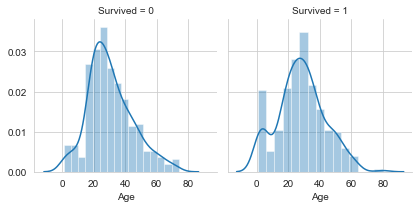

In [28]:
g= sea.FacetGrid(df_train,col='Survived')
g= g.map(sea.distplot,'Age')

** Age is the not very much determining factor for Survival prediction.**

** But it seems that passengers with young age have more chance of survival **

** Age data is also skewed so need logarithmic transformation **


In [29]:
nullAgeSubset=dataset.loc[dataset['Age'].isnull()]
nullAgeSubset.shape

(256, 12)

** Replace the missing values of Age column with entries with similar other parameters Else replace with mean age of dataset **

In [30]:
for index in nullAgeSubset.index:
    ageSubsetMean=dataset['Age'].loc[(dataset['Parch']==nullAgeSubset.loc[index]['Parch'])&(dataset['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(dataset['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(dataset['Embarked']==nullAgeSubset.loc[index]['Embarked'])&(dataset['Sex']==nullAgeSubset.loc[index]['Sex'])].mean()
    if(ageSubsetMean>0):
        dataset['Age'].loc[index]=ageSubsetMean
    else:
        ageSubsetMean=dataset['Age'].loc[(dataset['Parch']==nullAgeSubset.loc[index]['Parch'])&(dataset['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(dataset['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(dataset['Embarked']==nullAgeSubset.loc[index]['Embarked'])].mean()
        if(ageSubsetMean>0):
            dataset['Age'].loc[index]=ageSubsetMean
        else:
            ageSubsetMean=dataset['Age'].loc[(dataset['Parch']==nullAgeSubset.loc[index]['Parch'])&(dataset['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(dataset['Pclass']==nullAgeSubset.loc[index]['Pclass'])].mean()
            if(ageSubsetMean>0):
                dataset['Age'].loc[index]=ageSubsetMean
            else:
                dataset['Age'].loc[index]=dataset['Age'].mean()
                

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


** Check if any remaining null value for age **

In [31]:
dataset['Age'].isnull().sum()

0

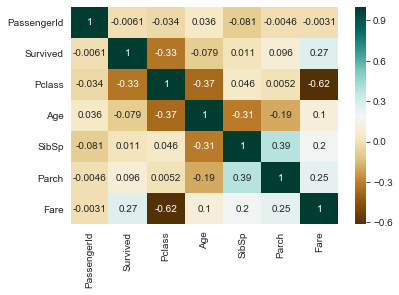

In [32]:
sea.heatmap(df_train.corr(),cmap='BrBG',annot=True)

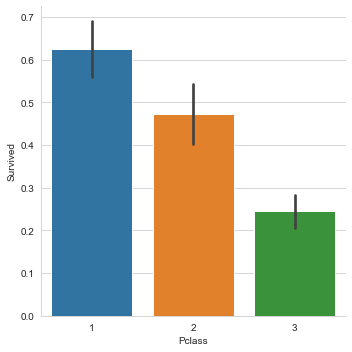

In [33]:
sea.catplot(data=dataset,x='Pclass',y='Survived',kind='bar')

** First class people have more count of survival **

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


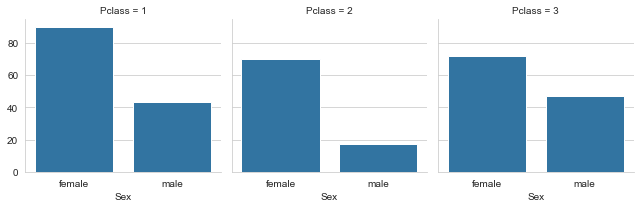

In [34]:
g=sea.FacetGrid(data=dataset.loc[dataset['Survived']==1],col='Pclass')
g=g.map(sea.countplot,'Sex')

**Above analysis shows that survival count of female is more the male irrespective of class **

In [35]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [36]:
X=dataset.drop(['Cabin','Name','PassengerId','Survived','Ticket'],axis=1)
Y=dataset['Survived']

In [37]:
X.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0
3,35.0,S,53.1000,0,1,female,1
4,35.0,S,8.0500,0,3,male,0


In [38]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [39]:
X['Embarked']=LabelEncoder().fit_transform(X['Embarked'])
X['Sex']=LabelEncoder().fit_transform(X['Sex'])
X['Age']=StandardScaler().fit_transform(np.array(X['Age']).reshape(-1,1))
X['Fare']=StandardScaler().fit_transform(np.array(X['Fare']).reshape(-1,1))

In [40]:
X.head(5)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,-0.573804,2,-0.532357,0,3,1,1
1,0.623446,0,0.846340,0,1,0,1
2,-0.274491,2,-0.517824,0,3,0,0
3,0.398961,2,0.454836,0,1,0,1
4,0.398961,2,-0.515133,0,3,1,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [42]:
trainDataX=X[:df_train.shape[0]]
trainDataY=Y[:df_train.shape[0]].astype('int32')
testDataX=X[df_train.shape[0]:]

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(trainDataX,trainDataY,test_size=0.1,random_state=101)

In [44]:
model=XGBClassifier(learning_rate=0.001,n_estimators=50,max_depth=9)
model.fit(X_train,Y_train)
accuracy_score(Y_train,model.predict(X_train))

0.8863636363636364

In [45]:
accuracy_score(Y_test,model.predict(X_test))

0.9101123595505618

In [46]:
submission=pd.DataFrame(columns=['PassengerId','Survived'])
submission['PassengerId']=ID_test
submission['Survived']=model.predict(testDataX)

In [47]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
filename='submission.csv'
submission.to_csv(filename,index=False)
from IPython.display import FileLink
FileLink(filename)

C:\Users\ayanb\Desktop\titanic\submission.csv